In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metcis
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Datasets
df = pd.read_excel(r'C:\Users\user\Desktop\dataset\CompData.xlsx')

In [4]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [12]:
#Removing First character
columnNameList=[]
def rename_cols():
    i=0
    for x in df:
        columnNme=df.columns[i]
        i=i+1
        if(x[0]=='_'):
            columnNme=columnNme[1:]
        columnNameList.append(columnNme)

In [13]:
rename_cols()

In [14]:
df.columns=columnNameList

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


In [17]:
df.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

In [19]:
df["Default"].value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [20]:
df["Default"].value_counts(normalize=True)

Default
0    0.8931
1    0.1069
Name: proportion, dtype: float64

In [21]:
df.drop(['Co_Name', 'Co_Code'],inplace=True,axis=1)

In [22]:
df.size

115248

# TREATING MISSING VALUE

In [23]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([ 5, 17, 29, 47]),)


In [24]:
cols_missing=df.isnull().sum()[df.isnull().sum()>0].index
cols_missing

Index(['Cash_Flow_Per_Share', 'Total_debt_to_Total_net_worth',
       'Cash_to_Total_Assets', 'Current_Liability_to_Current_Assets'],
      dtype='object')

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer= imputer.fit(df[cols_missing].iloc[:,:])

df[cols_missing]=imputer.transform(df[cols_missing])

In [26]:
df.isnull().sum().sum()

0

In [27]:
df_X = df.drop(['Default'], axis = 1)
df_Y = df['Default']

# Outliers Treatment

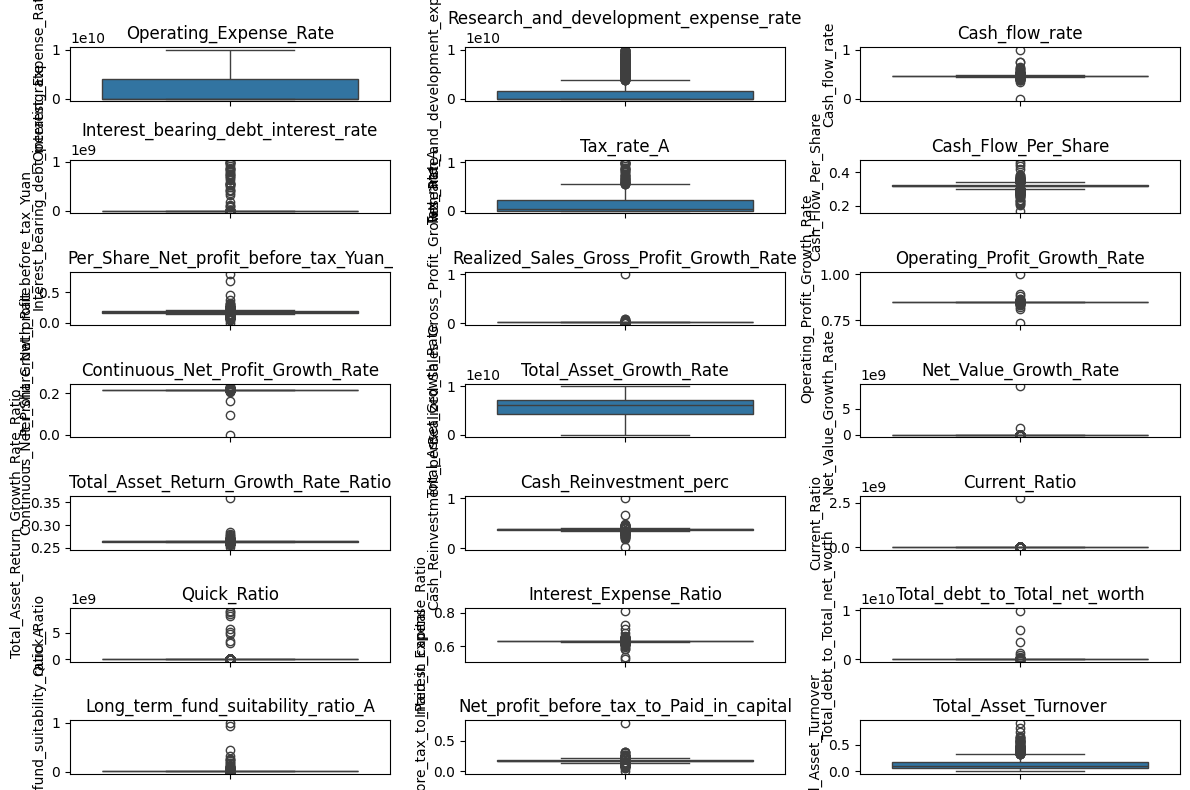

In [28]:
plt.figure(figsize=(12,8))
feature_list=df_X.columns
for i in range(21):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=df_X[feature_list[i]], data=df_X)
    plt.title(format(feature_list[i]))
    plt.tight_layout()

['Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Cash_flow_rate', 'Interest_bearing_debt_interest_rate', 'Tax_rate_A', 'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan_', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc', 'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio', 'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A', 'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover', 'Accounts_Receivable_Turnover', 'Average_Collection_Days', 'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person', 'Allocation_rate_per_person', 'Quick_Assets_to_Total_Assets', 'Cash_to_Total_Assets', 'Quick_Assets_to_Current_Liability', 'Cash_to_Current_Liability', 'Operating_Funds_to_Liabili

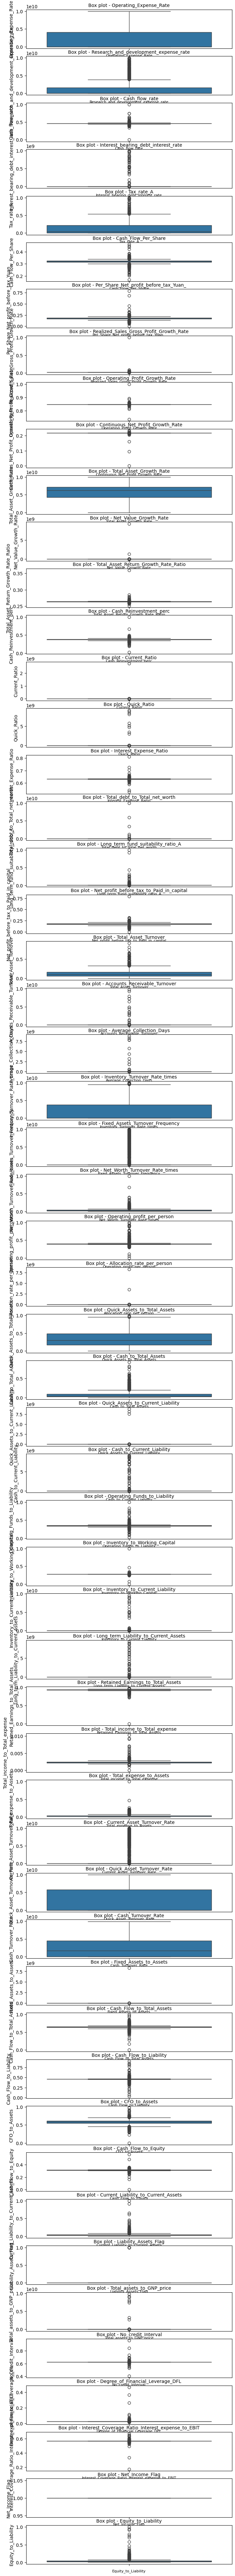

In [29]:
# plt.figure(figsize=(12,8))
# feature_list=df_X.columns
# for i in range(20, 39):
#     plt.subplot(5,4,i)
#     sns.boxplot(y=df_X[feature_list[i]], data=df_X)
#     plt.title(format(feature_list[i]))
#     plt.tight_layout()
feature_list=list(df_X.columns)
print(feature_list)
fig,ax=plt.subplots(len(feature_list), figsize=(8,100))
for i, col_val in enumerate(feature_list):
    print(col_val)
    sns.boxplot(y=df_X[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

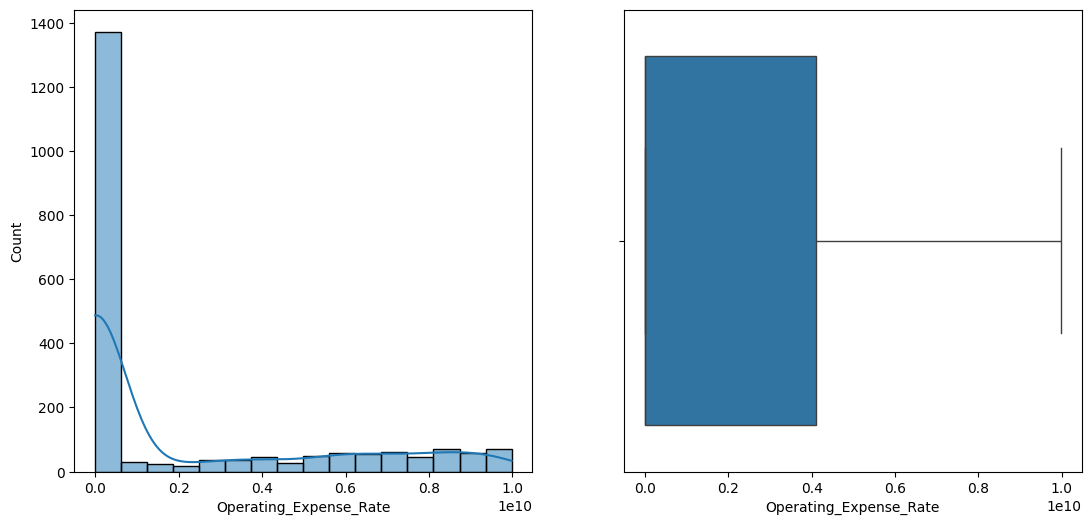

In [31]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Operating_Expense_Rate'], kde=True, ax=axes[0])
sns.boxplot(x='Operating_Expense_Rate', data=df, ax=axes[1])
plt.show()

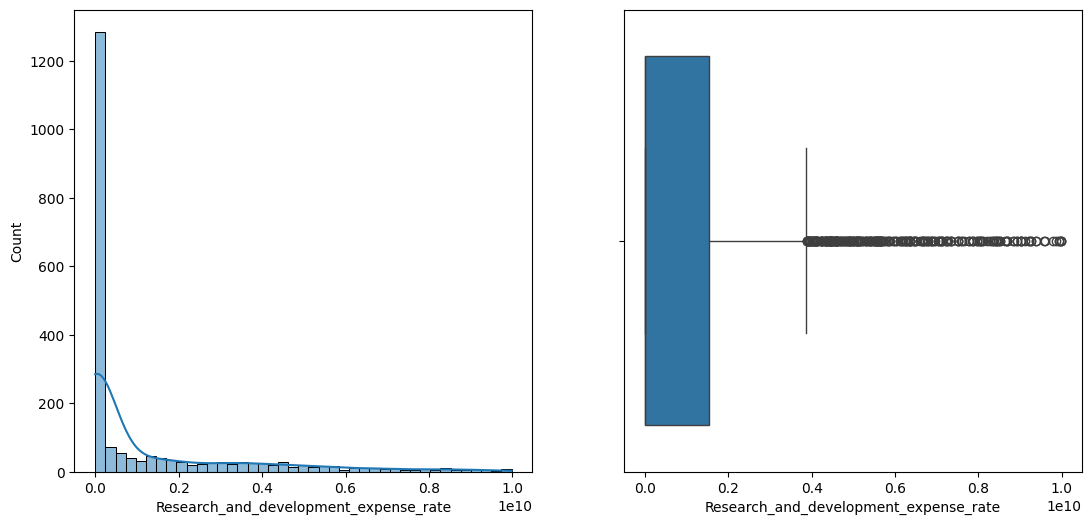

In [32]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Research_and_development_expense_rate'], kde=True, ax=axes[0])
sns.boxplot(x='Research_and_development_expense_rate', data=df, ax=axes[1])
plt.show()

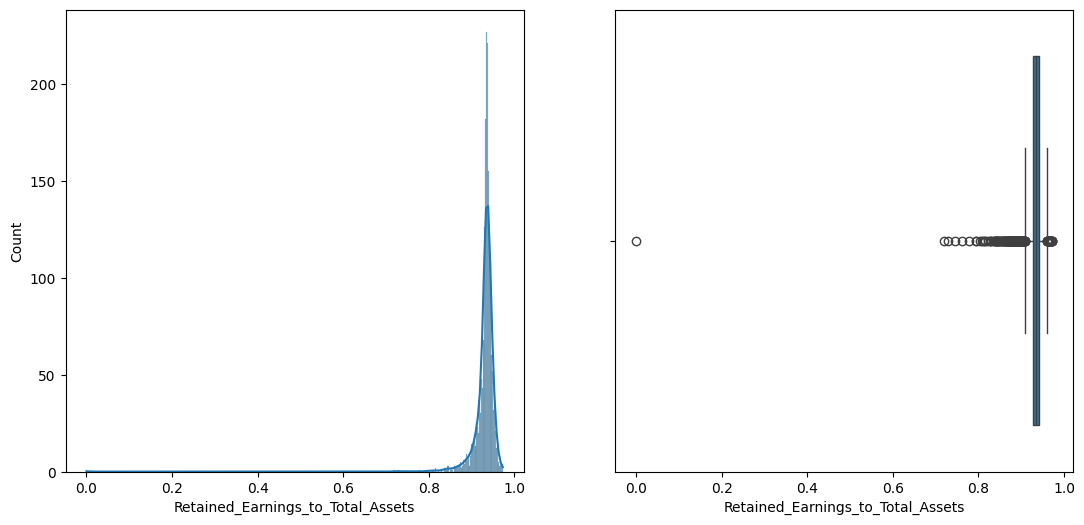

In [33]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Retained_Earnings_to_Total_Assets'], kde=True, ax=axes[0])
sns.boxplot(x='Retained_Earnings_to_Total_Assets', data=df, ax=axes[1])
plt.show()

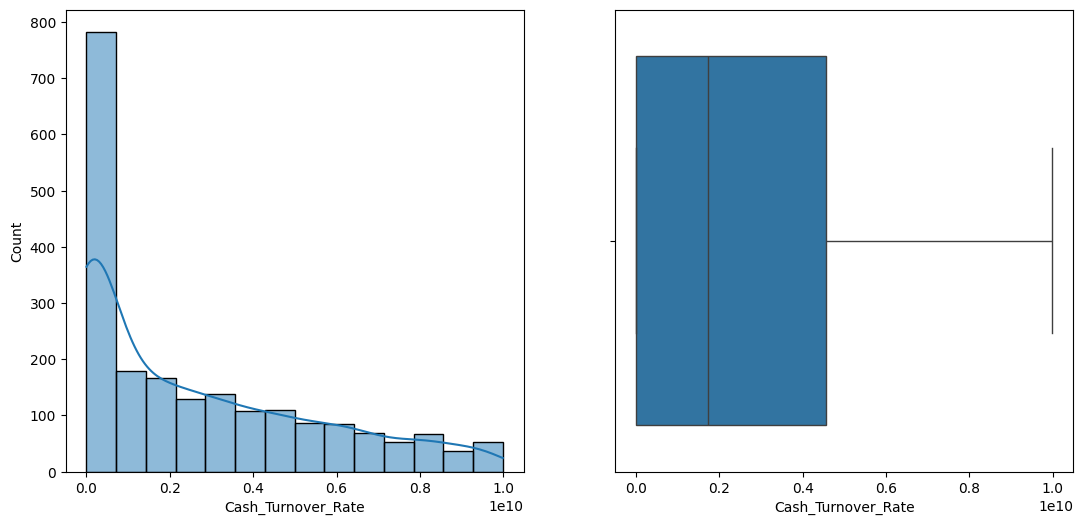

In [34]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Cash_Turnover_Rate'], kde=True, ax=axes[0])
sns.boxplot(x='Cash_Turnover_Rate', data=df, ax=axes[1])
plt.show()

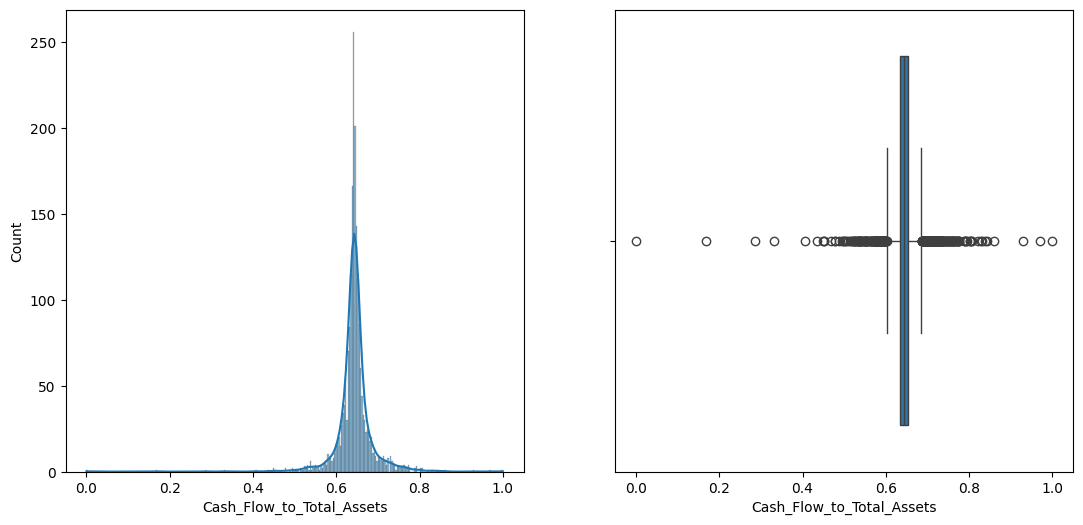

In [35]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Cash_Flow_to_Total_Assets'], kde=True, ax=axes[0])
sns.boxplot(x='Cash_Flow_to_Total_Assets', data=df, ax=axes[1])
plt.show()

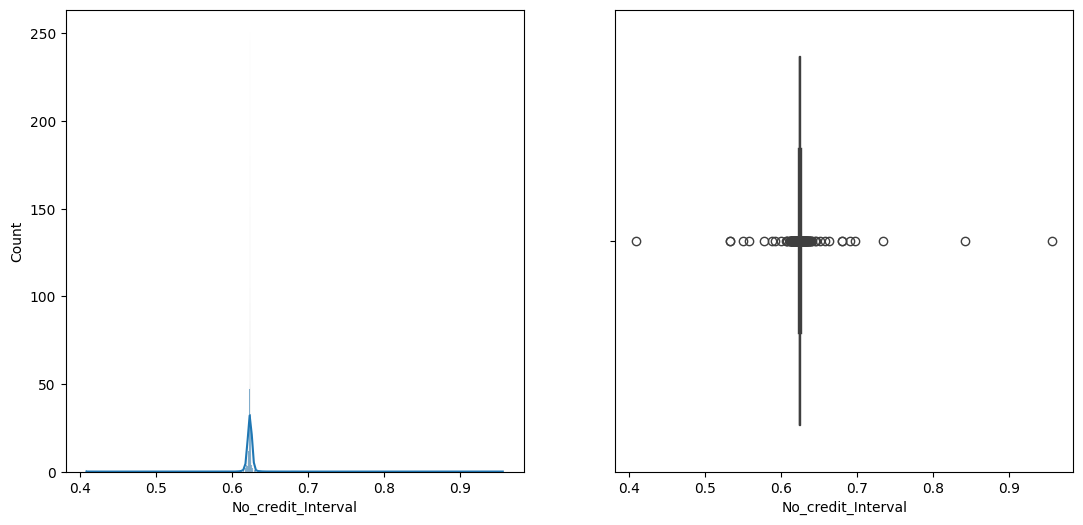

In [36]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['No_credit_Interval'], kde=True, ax=axes[0])
sns.boxplot(x='No_credit_Interval', data=df, ax=axes[1])
plt.show()

In [37]:
non_numeric_cols = df_X.select_dtypes(include=["object"]).columns.tolist()

In [38]:
df_X_numeric = df_X.drop(non_numeric_cols, axis=1)

In [39]:
Q1 = df_X_numeric.quantile(0.25)
Q3 = df_X_numeric.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [40]:
((((df_X > UL) | (df_X < LL)).sum()/df_X.index.size).sort_values(ascending=False))

Fixed_Assets_Turnover_Frequency                     0.243440
Current_Asset_Turnover_Rate                         0.225462
Degree_of_Financial_Leverage_DFL                    0.212828
Cash_Flow_to_Liability                              0.197765
No_credit_Interval                                  0.192420
Interest_Coverage_Ratio_Interest_expense_to_EBIT    0.182702
Operating_profit_per_person                         0.173469
Continuous_Net_Profit_Growth_Rate                   0.165209
Interest_Expense_Ratio                              0.159378
Cash_Flow_to_Total_Assets                           0.154033
Operating_Profit_Growth_Rate                        0.154033
Cash_Flow_to_Equity                                 0.148688
Net_Value_Growth_Rate                               0.147716
Realized_Sales_Gross_Profit_Growth_Rate             0.137512
Accounts_Receivable_Turnover                        0.136540
Research_and_development_expense_rate               0.128280
Cash_to_Current_Liabilit

In [41]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [42]:
for i in df_X:
    df_X[i]=treat_outlier(df_X[i])

0.000111127 0.00015787275 4110000000.0 8971499999.999998 <built-in function min> <built-in function max>
0.0 0.0 1550000000.0 6235999999.999994 <built-in function min> <built-in function max>
0.45200791775 0.460099142 0.46806908049999996 0.48237647095 <built-in function min> <built-in function max>
0.0 0.000276028 0.000663066 0.0010774079999999998 <built-in function min> <built-in function max>
0.0 0.0 0.21619090975 0.3416236463499999 <built-in function min> <built-in function max>
0.2999522528 0.315705242 0.325387282 0.33788816574999997 <built-in function min> <built-in function max>
0.14042328805 0.166603901 0.185885366 0.21451758669999998 <built-in function min> <built-in function max>
0.0219479388 0.022058314000000002 0.022151999 0.022579723299999997 <built-in function min> <built-in function max>
0.84770057975 0.84797396475 0.848114747 0.8485231827 <built-in function min> <built-in function max>
0.21737961015 0.217574132 0.21761982075 0.21774071545 <built-in function min> <built-i

# univariate and bivariate analysis

In [43]:
df_temp_2=df_X[['Operating_Expense_Rate',
'Research_and_development_expense_rate',
'Retained_Earnings_to_Total_Assets',
'Cash_Turnover_Rate',
'Cash_Flow_to_Total_Assets',
'No_credit_Interval' ,
'Interest_Coverage_Ratio_Interest_expense_to_EBIT']]

<Axes: >

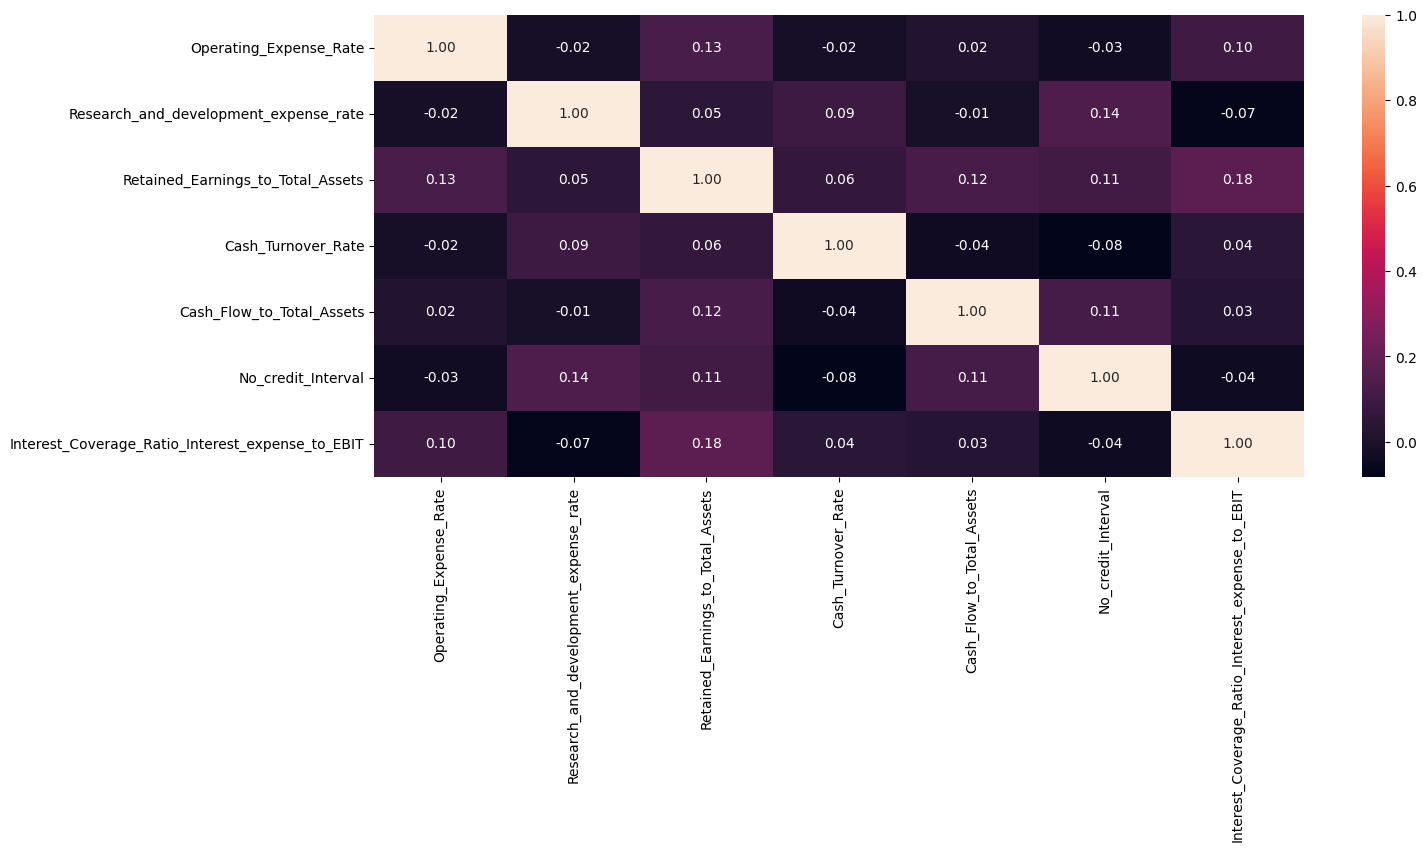

In [44]:
plt.figure(figsize=(15,6))
sns.heatmap(df_temp_2.corr(), annot=True, fmt=".2f")

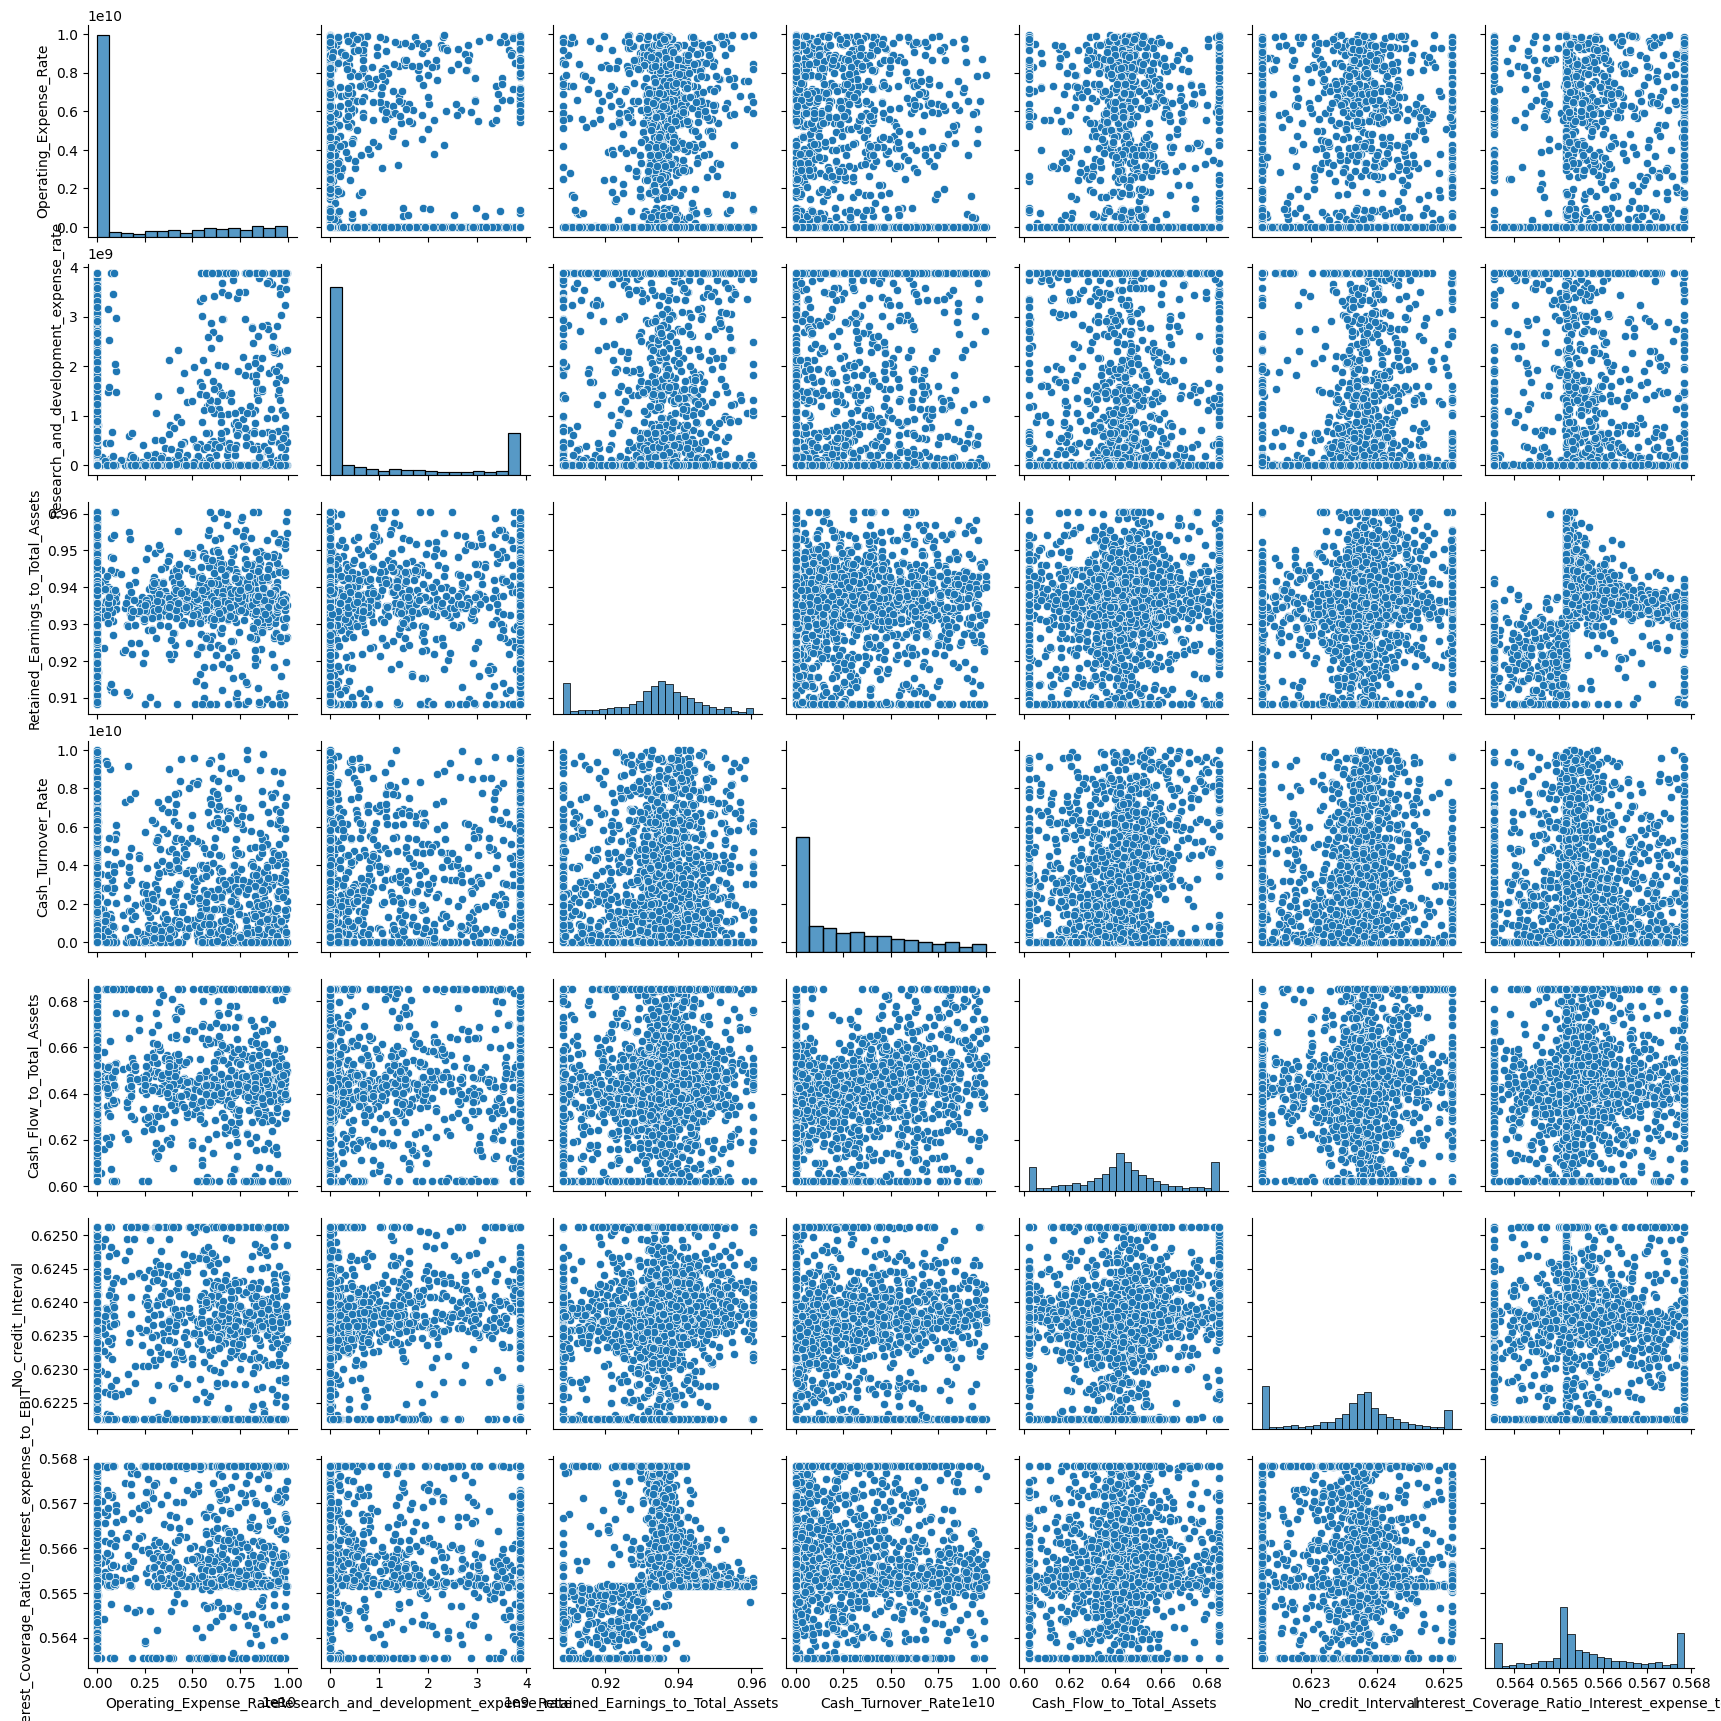

In [45]:
sns_plot = sns.pairplot(df_temp_2)

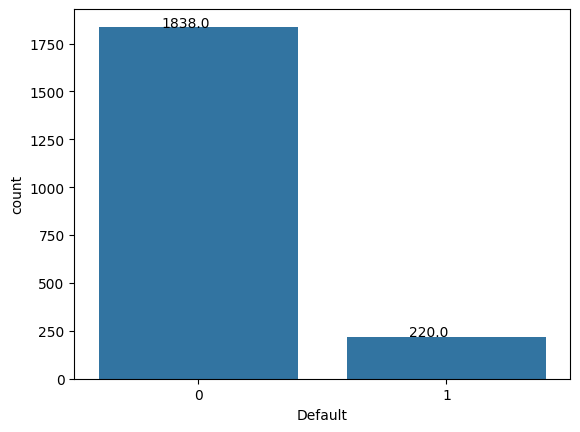

In [46]:
ax = sns.countplot(x='Default', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

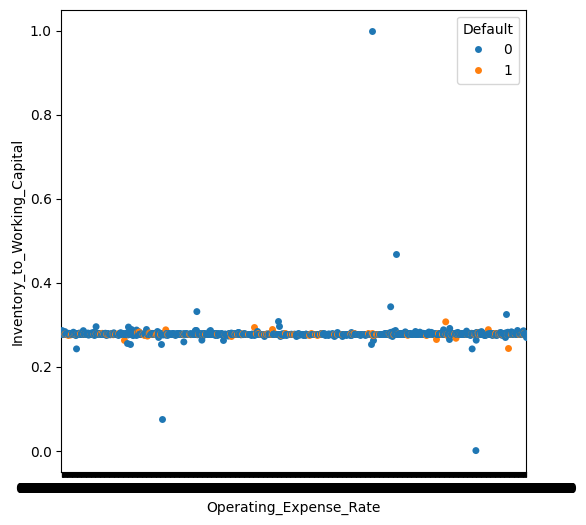

In [47]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Operating_Expense_Rate", y="Inventory_to_Working_Capital", data=df, hue="Default", jitter=True)
plt.show()

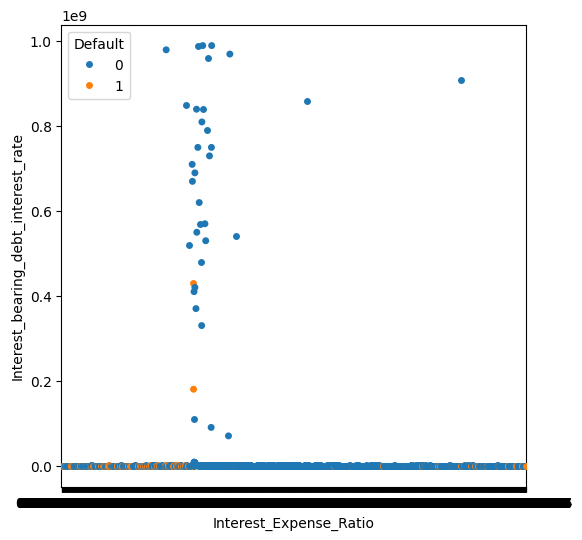

In [48]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Interest_Expense_Ratio", y="Interest_bearing_debt_interest_rate", data=df, hue="Default", jitter=True)
plt.show()

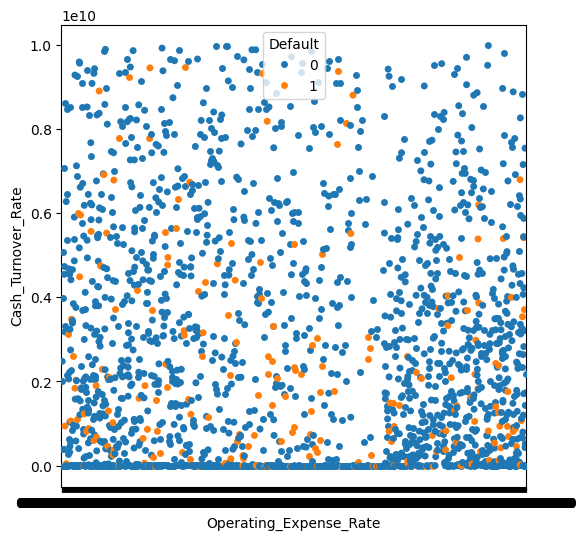

In [49]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Operating_Expense_Rate", y="Cash_Turnover_Rate", data=df, hue="Default", jitter=True)
plt.show()

# Train Test Split

In [50]:
import statsmodels.formula.api as SM

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.33,random_state=42,stratify=df['Default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [52]:
print('The number of rows (observations) in TRAIN set is',df_train.shape[0],'\n''The number of columns (variables) in TRAIN set is',df_train.shape[1])

The number of rows (observations) in TRAIN set is 1378 
The number of columns (variables) in TRAIN set is 56


In [53]:
print('The number of rows (observations) in TEST set is',df_test.shape[0],'\n''The number of columns (variables) in TEST set is',df_test.shape[1])

The number of rows (observations) in TEST set is 680 
The number of columns (variables) in TEST set is 56


# Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off.

In [54]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    return(vif)

In [55]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
53,Net_Income_Flag,0.000000
41,Cash_Turnover_Rate,1.127389
3,Interest_bearing_debt_interest_rate,1.140582
10,Total_Asset_Growth_Rate,1.212273
1,Research_and_development_expense_rate,1.220178
23,Inventory_Turnover_Rate_times,1.243070
0,Operating_Expense_Rate,1.375778
40,Quick_Asset_Turnover_Rate,1.431774
4,Tax_rate_A,1.652770
39,Current_Asset_Turnover_Rate,1.661499


In [56]:
f_1 = 'Default ~ Net_Income_Flag + Cash_Turnover_Rate + Interest_bearing_debt_interest_rate + Total_Asset_Growth_Rate + Research_and_development_expense_rate + Inventory_Turnover_Rate_times + Operating_Expense_Rate + Quick_Asset_Turnover_Rate + Tax_rate_A + Current_Asset_Turnover_Rate + No_credit_Interval + Inventory_to_Working_Capital + Total_assets_to_GNP_price + Long_term_Liability_to_Current_Assets + Fixed_Assets_Turnover_Frequency + Total_expense_to_Assets + Net_Value_Growth_Rate + Average_Collection_Days + Long_term_fund_suitability_ratio_A + Realized_Sales_Gross_Profit_Growth_Rate + Accounts_Receivable_Turnover + Allocation_rate_per_person + Operating_profit_per_person + Inventory_to_Current_Liability + Total_Asset_Return_Growth_Rate_Ratio + Cash_to_Total_Assets + Continuous_Net_Profit_Growth_Rate + Operating_Profit_Growth_Rate + Cash_to_Current_Liability + Degree_of_Financial_Leverage_DFL + Interest_Expense_Ratio'

In [57]:
f_1 = 'Default ~ Net_Income_Flag + Cash_Turnover_Rate + Interest_bearing_debt_interest_rate + Total_Asset_Growth_Rate + Research_and_development_expense_rate + Inventory_Turnover_Rate_times + Operating_Expense_Rate + Quick_Asset_Turnover_Rate + Tax_rate_A + Current_Asset_Turnover_Rate + No_credit_Interval + Inventory_to_Working_Capital + Total_assets_to_GNP_price + Long_term_Liability_to_Current_Assets + Fixed_Assets_Turnover_Frequency + Total_expense_to_Assets + Net_Value_Growth_Rate + Average_Collection_Days + Long_term_fund_suitability_ratio_A'

In [58]:
f_1 = 'Default ~ Net_Income_Flag + Cash_Turnover_Rate + Interest_bearing_debt_interest_rate + Total_Asset_Growth_Rate + Research_and_development_expense_rate + Inventory_Turnover_Rate_times + Operating_Expense_Rate + Quick_Asset_Turnover_Rate + Tax_rate_A + Current_Asset_Turnover_Rate + No_credit_Interval + Inventory_to_Working_Capital + Total_assets_to_GNP_price + Long_term_Liability_to_Current_Assets + Fixed_Assets_Turnover_Frequency + Total_expense_to_Assets'

In [59]:
df_train

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
2011,1.800460e-04,0.000000e+00,0.480024,0.000997,0.000000,0.336387,0.152595,0.022038,0.847988,0.217506,...,0.314654,0.018827,0.0,0.001359,0.623409,0.026761,0.565010,1,0.036286,0
697,1.123990e-04,1.750000e+09,0.466326,0.000242,0.315619,0.320648,0.193267,0.022065,0.847995,0.217583,...,0.309980,0.028661,0.0,0.001915,0.623787,0.026808,0.565237,1,0.030424,0
160,2.010920e-04,0.000000e+00,0.459057,0.000701,0.000000,0.314848,0.171349,0.022008,0.847921,0.217528,...,0.318314,0.039914,0.0,0.013423,0.623656,0.027410,0.567844,1,0.022672,0
1273,5.960000e+09,2.870000e+09,0.462547,0.000274,0.000000,0.320860,0.166604,0.022056,0.847960,0.217535,...,0.307139,0.030855,0.0,0.009573,0.624043,0.026507,0.563546,1,0.021530,0
541,1.448930e-04,6.620000e+08,0.460562,0.000567,0.000000,0.316333,0.164646,0.022036,0.847894,0.217506,...,0.314361,0.038939,0.0,0.007222,0.623365,0.026395,0.563546,1,0.026523,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,4.260000e+09,0.000000e+00,0.465336,0.000143,0.247900,0.323336,0.182722,0.022211,0.848169,0.217619,...,0.319186,0.026825,0.0,0.002422,0.625122,0.026811,0.565253,1,0.040674,1
1127,1.312470e-04,1.380000e+09,0.462995,0.000424,0.216317,0.322629,0.201100,0.022137,0.848045,0.217598,...,0.314596,0.030916,0.0,0.006155,0.623599,0.026863,0.565479,1,0.022271,0
950,5.940000e+09,0.000000e+00,0.464484,0.000776,0.181800,0.323301,0.178128,0.022092,0.848026,0.217601,...,0.317953,0.049127,0.0,0.016143,0.623017,0.027361,0.566925,1,0.025803,1
1058,1.943850e-04,3.875000e+09,0.469391,0.000572,0.214900,0.321461,0.185057,0.022084,0.848019,0.217596,...,0.315235,0.025508,0.0,0.016143,0.623784,0.026836,0.565362,1,0.054494,0


In [60]:
import statsmodels.formula.api as SM

In [61]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.268904
         Iterations 10


#  Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model

In [62]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.2080
Time:                        10:06:32   Log-Likelihood:                -370.55
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 9.812e-33
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               220.2627   8.22e+13   2.68e-12      1.000   -1.61e+14    1.61e+14
Net_Income_Flag                         218.1343   8.22e+13   2.65e-12      1.000   -1.61e+14    1.61e+14
Cash_Turnover_Rate                     -7.36e-11    3.8e-11     -1.939      0.053   -1.48e-10    8.05e-13
Interest_bearing_debt_interest_rate     796.0873    317.628      2.506      0.012     173.548    1418.626
Total_Asset_Growth_Rate               -2.746e-11   3.48e-11     -0.788      0.431   -9.58e-11    4.08e-11
Research_and_development_expense_rate  1.899e-10   6.41e-11      2.961      0.003    6.42e-11    3.16e-10
Inventory_Turnover_Rate_times          2.836e-11   3.19e-11      0.890      0.373   -3.41e-11    9.08e-11
Operating_Expense_Rate                  4.33e-11   3.14e-11      1.378      0.168   -1.83e-11    1.05e-10
Quick_Asset_Turnover_Rate               4.56e-12   3.05e-11      0.150      0.881   -5.51e-11    6.43e-11
Tax_rate_A                               -7.1820      1.349     -5.324      0.000      -9.826      -4.538
Current_Asset_Turnover_Rate             -47.2503     90.725     -0.521      0.603    -225.068     130.567
No_credit_Interval                     -610.9438    106.114     -5.757      0.000    -818.923    -402.965
Inventory_to_Working_Capital           -221.7725     90.928     -2.439      0.015    -399.988     -43.557
Total_assets_to_GNP_price                58.8519          0        inf      0.000      58.852      58.852
Long_term_Liability_to_Current_Assets    17.8103      8.304      2.145      0.032       1.535      34.086
Fixed_Assets_Turnover_Frequency          38.5969     12.112      3.187      0.001      14.858      62.336
Total_expense_to_Assets                  39.9464      8.114      4.923      0.000      24.044      55.849
=========================================================================================================
"""

In [63]:
f_2='Default ~ Interest_bearing_debt_interest_rate+Interest_bearing_debt_interest_rate+Tax_rate_A+No_credit_Interval+Total_assets_to_GNP_price+Fixed_Assets_Turnover_Frequency+Total_expense_to_Assets'

In [64]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.277541
         Iterations 10


In [65]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.1825
Time:                        10:06:32   Log-Likelihood:                -382.45
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.067e-34
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             299.3406     82.202      3.642      0.000     138.228     460.453
Interest_bearing_debt_interest_rate   894.1635    311.040      2.875      0.004     284.537    1503.790
Tax_rate_A                             -7.6679      1.323     -5.794      0.000     -10.262      -5.074
No_credit_Interval                   -486.4065    131.911     -3.687      0.000    -744.947    -227.866
Total_assets_to_GNP_price              62.8663     18.543      3.390      0.001      26.522      99.210
Fixed_Assets_Turnover_Frequency        45.0577     10.260      4.392      0.000      24.948      65.167
Total_expense_to_Assets                38.4578      5.140      7.483      0.000      28.385      48.531
=======================================================================================================
"""

In [66]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.16969770673948759


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [68]:
def calc_vif_1(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables_1"] = df1.columns
    vif["VIF_new"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

In [69]:
df1= df_train[['Interest_bearing_debt_interest_rate','Tax_rate_A','No_credit_Interval','Total_assets_to_GNP_price','Fixed_Assets_Turnover_Frequency','Total_expense_to_Assets']]

In [70]:
calc_vif_1(df1).sort_values(by='VIF_new', ascending = True)

,variables_1,VIF_new
4,Fixed_Assets_Turnover_Frequency,1.524950
1,Tax_rate_A,1.750402
3,Total_assets_to_GNP_price,2.186478
0,Interest_bearing_debt_interest_rate,3.602448
5,Total_expense_to_Assets,3.625082
2,No_credit_Interval,10.418753


In [71]:
y_prob_pred_train = model_2.predict(df_train)
y_prob_pred_train

2011    0.237171
697     0.005248
160     0.295384
1273    0.122934
541     0.134693
          ...   
1386    0.002212
1127    0.022466
950     0.063427
1058    0.029221
562     0.168376
Length: 1378, dtype: float64

In [72]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

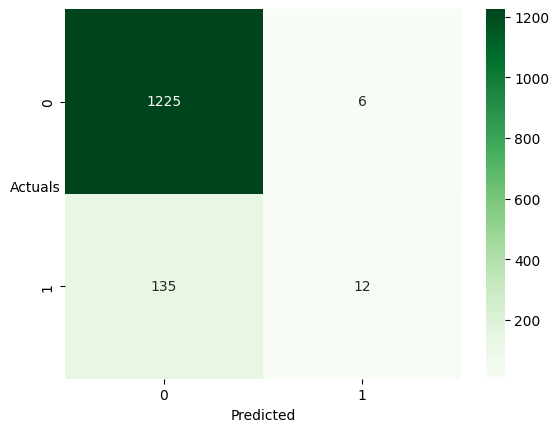

In [73]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [74]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

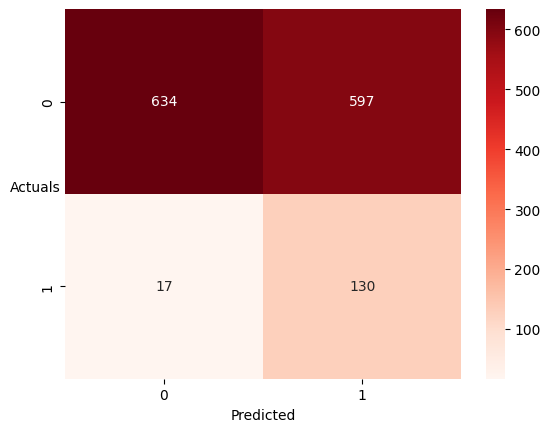

In [75]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [76]:
from sklearn.feature_selection import RFE #Very important
from sklearn.linear_model import LogisticRegression

In [77]:
LogR = LogisticRegression()

In [78]:
selector = RFE(estimator = LogR, n_features_to_select=14, step=1)

In [79]:
selector = selector.fit(X_train, y_train)

In [80]:
selector.n_features_

14

In [81]:
selector.ranking_

array([ 1,  1,  3, 40, 11,  8, 13, 23,  1, 15,  1, 39, 12,  6, 22, 25,  1,
       32, 30, 14, 16, 35, 33,  1, 37, 20,  5, 31,  2, 17, 24, 26,  7, 10,
       27, 41,  1, 34, 28, 38,  1,  1, 18,  1,  4,  1,  9, 29, 42, 36,  1,
       21,  1,  1, 19])

In [82]:
df_predCol = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df_predCol[df_predCol['Rank'] == 1]

,Feature,Rank
0,Operating_Expense_Rate,1
1,Research_and_development_expense_rate,1
8,Operating_Profit_Growth_Rate,1
10,Total_Asset_Growth_Rate,1
16,Interest_Expense_Ratio,1
23,Inventory_Turnover_Rate_times,1
36,Retained_Earnings_to_Total_Assets,1
40,Quick_Asset_Turnover_Rate,1
41,Cash_Turnover_Rate,1
43,Cash_Flow_to_Total_Assets,1


In [83]:
f_pred_col = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Operating_Profit_Growth_Rate + Total_Asset_Growth_Rate +  Interest_Expense_Ratio + Inventory_Turnover_Rate_times + Retained_Earnings_to_Total_Assets + Quick_Asset_Turnover_Rate + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets + CFO_to_Assets + No_credit_Interval  + Interest_Coverage_Ratio_Interest_expense_to_EBIT'

In [84]:
# f_pred_col = 'Default ~ Operating_Expense_Rate +
# Research_and_development_expense_rate + Operating_Profit_Growth_Rate +
# Total_Asset_Growth_Rate + Interest_Expense_Ratio +
# Inventory_Turnover_Rate_times + Retained_Earnings_to_Total_Assets +
# Quick_Asset_Turnover_Rate + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets
# +CFO_to_Assets + No_credit_Interval +
# Interest_Coverage_Ratio_Interest_expense_to_EBIT + Net_Income_Flag' %% AUC and
# ROC for the training data

In [85]:
#f_pred_col = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Operating_Profit_Growth_Rate + Total_Asset_Growth_Rate + Interest_Expense_Ratio +  Inventory_Turnover_Rate_times + Retained_Earnings_to_Total_Assets + Quick_Asset_Turnover_Rate + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets +CFO_to_Assets  + No_credit_Interval + Interest_Coverage_Ratio_Interest_expense_to_EBIT'

In [86]:
#model_2 = SM.logit(formula = f_2, data=df_train).fit()
model_3 = SM.logit(formula = f_pred_col, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.236845
         Iterations 15


In [87]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.3024
Time:                        10:06:33   Log-Likelihood:                -326.37
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.829e-53
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         1495.1419    600.961      2.488      0.013     317.279    2673.005
Operating_Expense_Rate                            6.917e-11   3.35e-11      2.066      0.039    3.56e-12    1.35e-10
Research_and_development_expense_rate             2.632e-10   6.77e-11      3.887      0.000     1.3e-10    3.96e-10
Operating_Profit_Growth_Rate                     -1240.5302    710.343     -1.746      0.081   -2632.777     151.717
Total_Asset_Growth_Rate                          -3.076e-12   4.05e-11     -0.076      0.939   -8.25e-11    7.63e-11
Interest_Expense_Ratio                              55.0748    170.999      0.322      0.747    -280.078     390.227
Inventory_Turnover_Rate_times                    -1.357e-11   3.54e-11     -0.383      0.702    -8.3e-11    5.59e-11
Retained_Earnings_to_Total_Assets                 -110.4750     10.116    -10.921      0.000    -130.302     -90.648
Quick_Asset_Turnover_Rate                        -3.027e-12   3.09e-11     -0.098      0.922   -6.35e-11    5.74e-11
Cash_Turnover_Rate                               -8.349e-11   4.12e-11     -2.027      0.043   -1.64e-10   -2.77e-12
Cash_Flow_to_Total_Assets                           -9.5654      4.769     -2.006      0.045     -18.913      -0.218
CFO_to_Assets                                        0.1467      2.001      0.073      0.942      -3.775       4.068
No_credit_Interval                                -482.8066    133.956     -3.604      0.000    -745.356    -220.257
Interest_Coverage_Ratio_Interest_expense_to_EBIT  -125.1135    170.949     -0.732      0.464    -460.168     209.941
====================================================================================================================
"""

In [88]:
f_pred_col_2 = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate  + Retained_Earnings_to_Total_Assets  + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets  + No_credit_Interval '

In [89]:
model_4 = SM.logit(formula = f_pred_col_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.238748
         Iterations 9


In [90]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.2968
Time:                        10:06:34   Log-Likelihood:                -328.99
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.883e-57
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               402.2719     83.438      4.821      0.000     238.736     565.808
Operating_Expense_Rate                 6.862e-11   3.27e-11      2.096      0.036    4.44e-12    1.33e-10
Research_and_development_expense_rate  2.676e-10   6.63e-11      4.035      0.000    1.38e-10    3.98e-10
Retained_Earnings_to_Total_Assets      -117.2409      9.131    -12.840      0.000    -135.137     -99.345
Cash_Turnover_Rate                    -8.588e-11   4.09e-11     -2.099      0.036   -1.66e-10   -5.68e-12
Cash_Flow_to_Total_Assets               -10.5746      4.637     -2.280      0.023     -19.663      -1.486
No_credit_Interval                     -463.8164    132.203     -3.508      0.000    -722.930    -204.702
=========================================================================================================
"""

AUC: 0.700


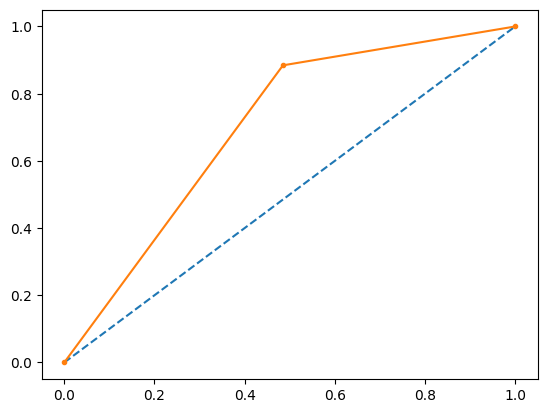

In [91]:
# AUC and ROC for the training data

# predict probabilities
# probs = model_4.predict_proba(y_class_pred)
# # keep probabilities for the positive outcome only
# probs = probs[:, 1]
# # calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(df_train['Default'], y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

LOGISTIC MODEL USING TEST DATA

In [92]:
y_prob_pred_test = model_4.predict(df_test)

In [93]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.966     0.843     0.901       607
           1      0.367     0.753     0.493        73

    accuracy                          0.834       680
   macro avg      0.666     0.798     0.697       680
weighted avg      0.902     0.834     0.857       680



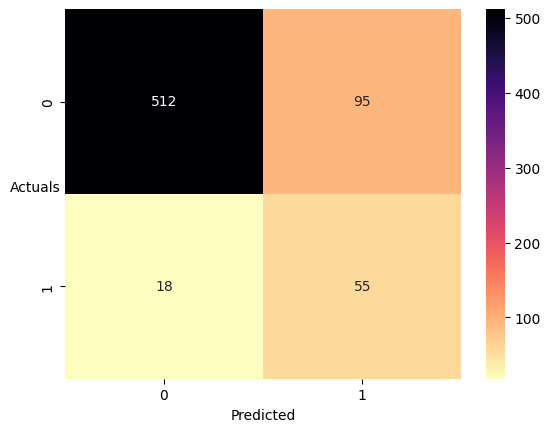

In [94]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='magma_r');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_test['Default'],y_class_pred,digits=3))

AUC: 0.798


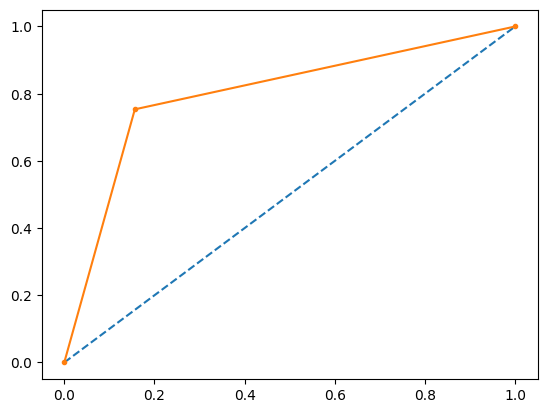

In [95]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(df_test['Default'], y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_test['Default'], y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [97]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [42]
}

In [98]:
RF_model=RandomForestClassifier()

In [99]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [100]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [42]})

In [101]:
RF_model_Fit=grid_search.best_estimator_

In [102]:
X_train

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability
2011,1.800460e-04,0.000000e+00,0.480024,0.000997,0.000000,0.336387,0.152595,0.022038,0.847988,0.217506,...,0.705235,0.314654,0.018827,0.0,0.001359,0.623409,0.026761,0.565010,1,0.036286
697,1.123990e-04,1.750000e+09,0.466326,0.000242,0.315619,0.320648,0.193267,0.022065,0.847995,0.217583,...,0.618374,0.309980,0.028661,0.0,0.001915,0.623787,0.026808,0.565237,1,0.030424
160,2.010920e-04,0.000000e+00,0.459057,0.000701,0.000000,0.314848,0.171349,0.022008,0.847921,0.217528,...,0.552127,0.318314,0.039914,0.0,0.013423,0.623656,0.027410,0.567844,1,0.022672
1273,5.960000e+09,2.870000e+09,0.462547,0.000274,0.000000,0.320860,0.166604,0.022056,0.847960,0.217535,...,0.583007,0.307139,0.030855,0.0,0.009573,0.624043,0.026507,0.563546,1,0.021530
541,1.448930e-04,6.620000e+08,0.460562,0.000567,0.000000,0.316333,0.164646,0.022036,0.847894,0.217506,...,0.556568,0.314361,0.038939,0.0,0.007222,0.623365,0.026395,0.563546,1,0.026523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,4.260000e+09,0.000000e+00,0.465336,0.000143,0.247900,0.323336,0.182722,0.022211,0.848169,0.217619,...,0.588670,0.319186,0.026825,0.0,0.002422,0.625122,0.026811,0.565253,1,0.040674
1127,1.312470e-04,1.380000e+09,0.462995,0.000424,0.216317,0.322629,0.201100,0.022137,0.848045,0.217598,...,0.586526,0.314596,0.030916,0.0,0.006155,0.623599,0.026863,0.565479,1,0.022271
950,5.940000e+09,0.000000e+00,0.464484,0.000776,0.181800,0.323301,0.178128,0.022092,0.848026,0.217601,...,0.595353,0.317953,0.049127,0.0,0.016143,0.623017,0.027361,0.566925,1,0.025803
1058,1.943850e-04,3.875000e+09,0.469391,0.000572,0.214900,0.321461,0.185057,0.022084,0.848019,0.217596,...,0.591628,0.315235,0.025508,0.0,0.016143,0.623784,0.026836,0.565362,1,0.054494


In [103]:
## Performance Matrix on train data set
y_train_predict = RF_model_Fit.predict(X_train)
model_score =RF_model_Fit.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.93033381712627
[[1216   15]
 [  81   66]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1231
           1       0.81      0.45      0.58       147

    accuracy                           0.93      1378
   macro avg       0.88      0.72      0.77      1378
weighted avg       0.92      0.93      0.92      1378



Axes(0.125,0.11;0.62x0.77)


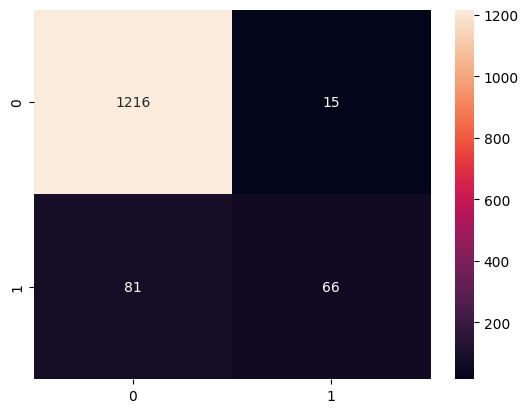

In [104]:
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True , fmt="2g"))

AUC: 0.954


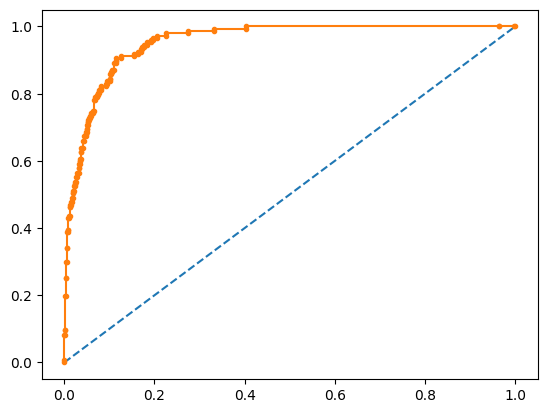

In [105]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model_Fit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [106]:
# Performance Matrix on test data set
y_test_predict = RF_model_Fit.predict(X_test)
model_score = RF_model_Fit.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.9161764705882353
[[595  12]
 [ 45  28]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       607
           1       0.70      0.38      0.50        73

    accuracy                           0.92       680
   macro avg       0.81      0.68      0.72       680
weighted avg       0.91      0.92      0.91       680

